# Ability - Wealth Modelling

Ability like IQ can be modelled as a normal distribution, however, wealth in society follows a power law. Why is this the case? Suppose if outcomes are path dependent, with the state in previous steps influencing the later steps, will the final distribution follow a power law? This notebook seeks to model this. 

Results: Apparently, this is true. Oh wow!

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from pylab import rcParams
import scipy.stats 

%matplotlib inline

## Initial Parameters

We have an initial population size of 1000. 

Consider Ability to be between 0-100 following a truncated normal distribution.

Consider Initial wealth to be 0. (To experiment with initial wealth distributions)

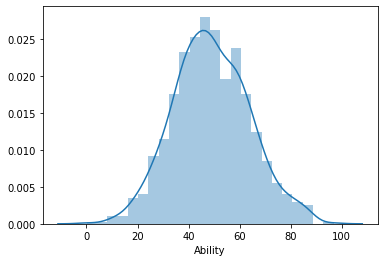

In [26]:
N = 1000

lower = 0
upper = 100
mu = 50
sigma = 15

ability = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

wealth = np.zeros(shape=(N))

pd_ability = pd.Series(ability, name="Ability")
sns.distplot(pd_ability)

## Transition Function
At every time period, conditioned upon given ability and current wealth the wealth goes up or down given some percentage chance

In [21]:
def trans_fn(wealth_el, ability_el):
    """
    Outputs new wealth
    """
    # take the simple average of wealth and ability / 100. 
    # This gives us the probability of going up
    avg_el = (wealth_el + ability_el) / 2
    probability = avg_el / 100
    
    if probability > np.random.rand():
        return wealth_el + 1
    else:
        if wealth_el > 0:
            return wealth_el - 1
        else:
            return 0
    

vtrans_fn = np.vectorize(trans_fn)

# Sanity Check
# print(wealth)
# new_wealth = vtrans_fn(wealth, ability)
# print(new_wealth)

## Test The Evolution of the System
We run the system for 100 epochs and see the way the wealth distribution evolves

In [27]:
results = []
epochs = 100


for i in range(epochs): 
    results.append(wealth)
    wealth = vtrans_fn(wealth, ability)

## Observe Final Wealth
We get a power law looking like distribution. Interesting !!

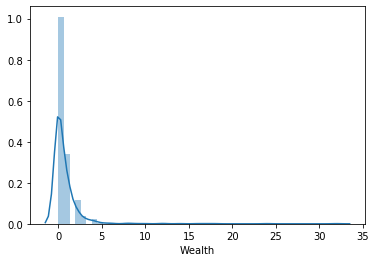

In [31]:
pd_wealth = pd.Series(wealth, name="Wealth")
sns.distplot(pd_wealth)

## Todo: Do an animation to visualize the evolution of wealth over the epoch